# Exploratory analysis: Exoplanets

This notebook contains a variety of techniques you can use in an exploratory analysis of an unseen dataset. In an exploratory analysis, we aren't necessarily going in with any particular goal. Rather, we are just trying to understand the data, and see if there are any interesting insights we can glean from it.

Because the nature of an exploratory analysis depends on the dataset and what you hope to do with it, there are no rules for how to conduct an analysis. However, the techniques shown in this notebook are a good place to start.

This analysis is conducted on a dataset of exoplanets, or planets outside our solar system. It contains a basic analysis of the data with an emphasis on dealing with missing values. We have seen this dataset and performed parts of this analysis before (specifically, looking for missing values).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/planets.csv")

In [3]:
# The Pandas head() method is useful for quickly and concicely viewing the dataset.
# We immediately see the available columns and the kind of data they contain.
# Columns of interest include:
#
#   method: The method used to discover the exoplanet.
#   orbital_period: The time it takes the planet to make a complete orbit around
#           its star.
#   mass: Self-explanatory, the mass of the planet.
#   distance: The distance in parsecs from Earth.
#   year: The year the planet was discovered.
#
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
# The info() method gives us more technical details about the dataset.
# We see how many rows there are (1035), the columns, and their types.
# Additionally, we see the number of rows in the dataframe which are non-null.
#
# The dataset looks good, but the amount of missing data is concerning:
# approximately half of the mass values are missing. We will investigate this later.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
# Now, let's compute some summary statistics about the data.
# We can call the describe() method on a DataFrame to compute a
# variety of descriptive statistics about each numeric column.
# Note that method is missing: because it's a string, we can't
# compute numeric values like the mean, minimum, and maximum.
#
# From this, we can make a few interesting observations:
#
#   1. Though we aren't sure what the value means, 50% of the
#      planets have a number value of 1. 75% of the planets have
#      a number value of 2 or 1. However, the maximum is 7.
#   2. Most orbital periods are fairly small: 50% of them are less
#      than ~38. 75% of them are less than ~526. However, the longest
#      orbital period is 730,000. This suggests a significant skew
#      in the data, which we will confirm with visualization later.
#   3. A similar skew probably exists for distance too, but it does
#      not appear to be as extreme.
#   4. All the planets in our dataset were discovered between 1989 and
#      2014. This does not mean all exoplanets were discovered between
#      these years: it's possible some were discovered outside of these
#      dates, but this is all we have access to in this dataset.
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [6]:
# Because the method of discovery was not included in the description
# above, it would be nice to get some information about it. We can use
# the unique() method to generate an array of all unique values found in
# the column.
df['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [7]:
# To see how frequently each of these discovery methods occur in the
# dataset, we can use value_counts(). We see that the vast majority of
# planets were discovered through the Radial Velocity or Transit method,
# with some discovered by imaging and microlensing, and very few discovered
# with the other techniques.
df['method'].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

<Axes: xlabel='method'>

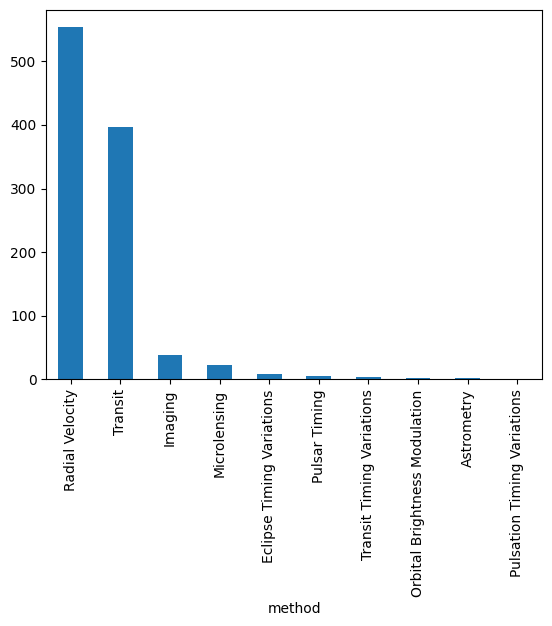

In [8]:
# We cna visualize the counts as a bar chart by taking advantage of Pandas's
# interface into the Matplotlib visualization library:
df['method'].value_counts().plot.bar()

<Axes: xlabel='year'>

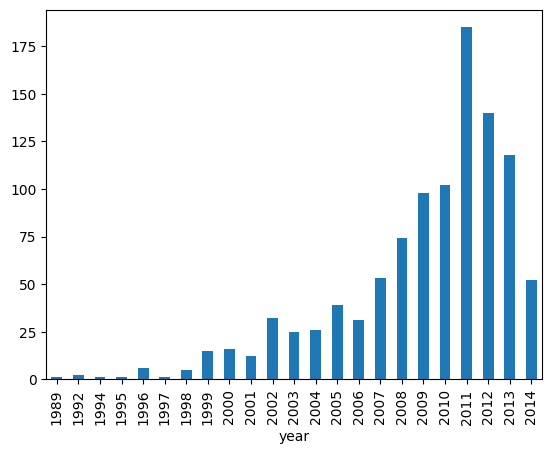

In [9]:
# We can perform a similar analysis of the year column. Note that if we do
# not call sort_index (which rearranges the data so the index is in order from
# smallest to largest), the bar chart does not show years chronologically.
df['year'].value_counts().sort_index().plot.bar()

In [10]:
# Now we investigate the missing values in the dataset. We could simply count them,
# but this doesn't give us any additional information we didn't have from our
# call to info():
df['orbital_period'].isnull().sum(0)

43

In [11]:
# We could also use the isnull() function, but this doesn't help us either.
# There are too many rows of data to follow along.
df.isnull()

,method,number,orbital_period,mass,distance,year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1030,False,False,False,True,False,False
1031,False,False,False,True,False,False
1032,False,False,False,True,False,False
1033,False,False,False,True,False,False


<Axes: >

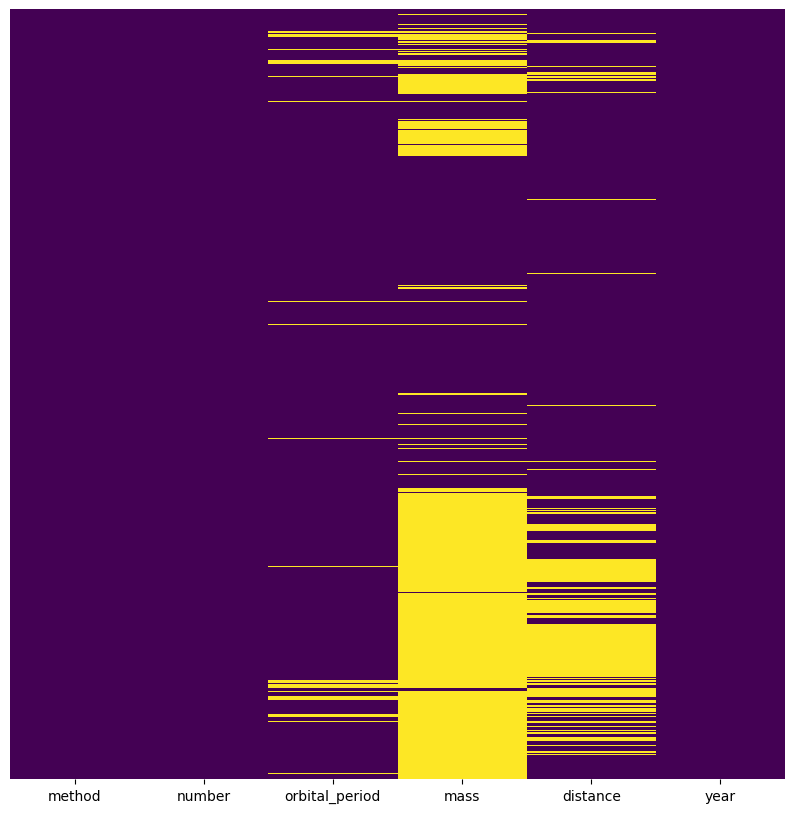

In [12]:
# Instead, we can visualize the missing values using a heatmap.
# Looking at the heat map, we see the extent of the missing values.
#
# For the remainder of our analysis, we can ignore the issue of missing
# values, since Pandas will ignore them when computing summary statistics
# or when doing visualization. However, it is worth considering how we might
# deal with them if we were to do anything more advanced in the dataset:
#
# Option 1: Drop by rows
#   This option would result in a significant amount (about half) of the data
#   being removed. We are fortunate is that there is a lot of overlap in the
#   missing values (there are only a few cases where distance is missing but
#   mass is not). However, we have to consider if removing half of our data is
#   appropriate for what we want to do.
# Option 2: Drop by column
#   If we drop the mass column, it would result in far fewer empty values.
#   However, we have to consider that out of all 6 columns, only 3 are confirmed
#   to involve direct observations of the planet itself: mass, orbital_period,
#   and distance. Year, method, and presumably number (unknown) do not provide
#   useful data about the planet itself. Consequently, dropping the mass column
#   removes a massive amount of useful information.
# Option 3: Filling missing values
#   This probably won't work well, since so many values are missing for mass that
#   it is difficult to think of a number that would not significantly alter the
#   dataset.
#
# For this analysis, we can ignore the missing values because Pandas will too.
# However, it is important to keep in mind that many planets are missing values.
# For example, if we report the average mass, we may want to disclose that it is
# the average of planets with mass, but there are many more with unknown mass.
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [13]:
# If we dropped rows with missing data, this would result in 498 remaining rows.
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 784
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          498 non-null    object 
 1   number          498 non-null    int64  
 2   orbital_period  498 non-null    float64
 3   mass            498 non-null    float64
 4   distance        498 non-null    float64
 5   year            498 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 27.2+ KB


In [14]:
# Next, we create a correlation matrix from our data. A correlation matrix
# shows us if any columns are related to one another. Specifically, it shows
# us if there is a linear relationship between two columns.
#
# A brief disussion of the contents of this matrix:
#
# Values of 1 indicate a perfect positive relationship between column A (row)
# and column B (column): When A increases, B increases by the same amount,
# and when A decreases, B decreases by the same amount.
#
# Values of -1 indicate a perfect negative relationship between column A (row)
# and column B (column): When A increases, B decreases by the same amount,
# and when A decreases, B increases by the same amount.
#
# Values of 0 indicate that there is no relationship between column A (row)
# and column B (column): neither A or B increase or decrease in any discernable
# relationship between one another.
#
# Values 0 to 1 indicate a positive relationship that is weak (close to 0)
# or strong (close to 1). Values -1 to 0 indicate a negative relationship
# that is weak (close to 0) or strong (close to -1).
#
# Some selected correlations are highlighted and discussed in the cells below.
sns.heatmap(df.corr(), annot=True, cmap="Blues")

ValueError: could not convert string to float: 'Radial Velocity'

<Axes: xlabel='distance', ylabel='mass'>

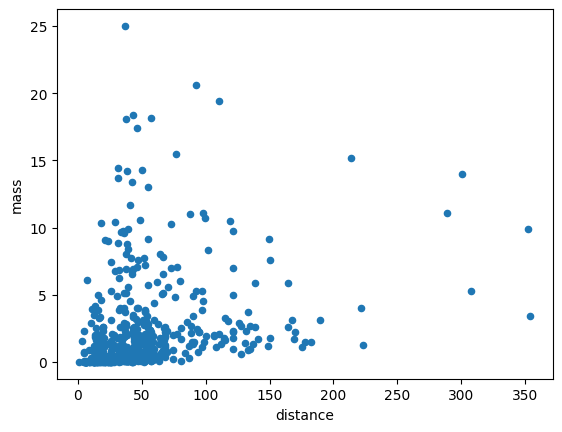

In [ ]:
# In the correlation matrix, we see there is a weak positive relationship
# between mass and distance. If we plot mass against distance, we see that
# mass does appear to increase slightly as distance increases.
#
# It is difficult to draw solid conclusions from correlation matrices (correlation
# does not imply causation!). However, we might speculate that faraway exoplanets
# are harder to find, and higher-mass faraway planets are easier to find than
# lower-mass faraway planets.
df.plot.scatter(x="distance", y="mass")

<Axes: xlabel='year', ylabel='distance'>

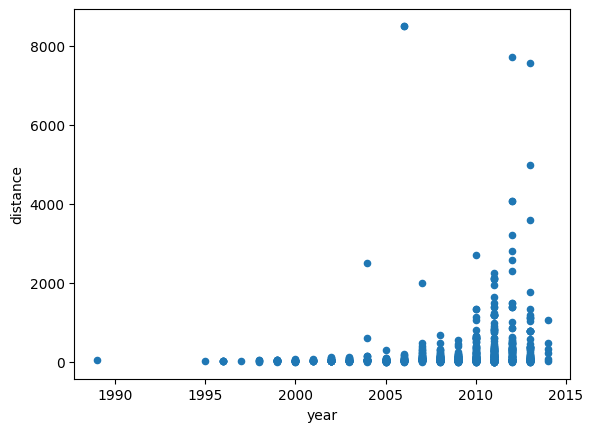

In [ ]:
# We see a weak positive relationship between distance and year.
# This also makes sense: it seems reasonable that we might find all the nearby
# planets as soon as we start looking, and it is only through persistent searching
# and technological advancements that we discover planets further away.
# However, this is a very weak positive correlation (only .18), so it is
# difficult to draw any solid conclusions from the data we have.
df.plot.scatter(x="year", y="distance")

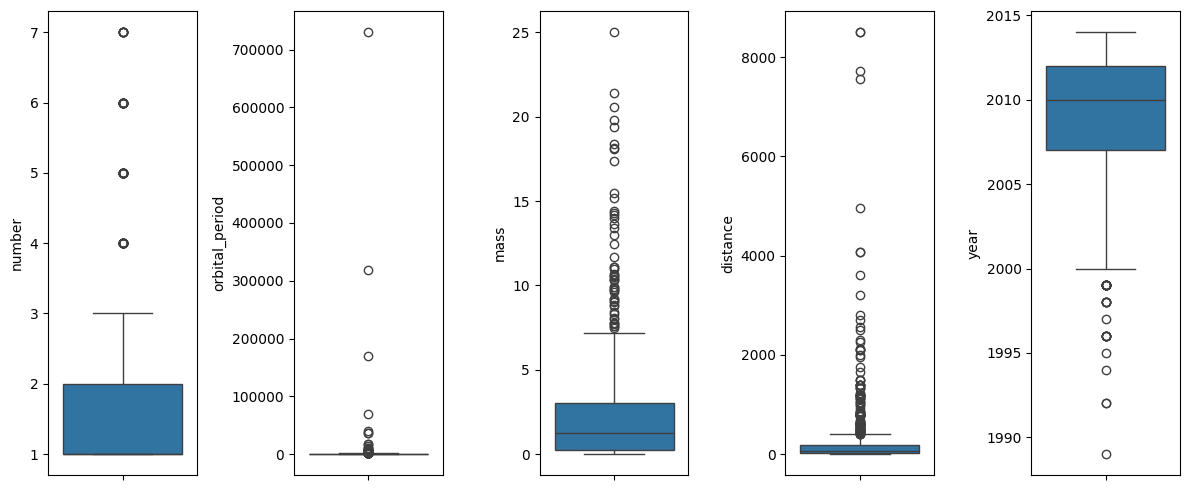

In [ ]:
# To help us further visualize the distribution of the data, we can create
# box plots. Box plots visualize data quartiles, minimum and maximum values,
# and outliers. The box represents the boundaries of the 1st and 3rd quartile,
# a line in the box represents the 2nd (the medium), and the "whiskers" extending
# from the top and bottom of the box define the boundary between typical values
# and outliers. Outliers are marked as points outside of the whiskers.
#
# Note that the 1st quartile, 2nd quartile, and 3rd quartile were already shown
# to us in our call to describe() several cells above. The 1st quartile is
# 25% of the data, the 2nd is 50% (the median), and the 3rd is 75% of the data.
#
# Boxplot visualization: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# Only select numeric columns
columns = ['number', 'orbital_period', 'mass', 'distance', 'year']
num_columns = len(columns)

plt.figure(figsize=(12, 5))
for i in range(num_columns):
  # Plot a boxplot of each numeric column in a suplot.
  # This subplot has room for 1 row of charts, with 5 charts per row.
  # The 3rd parameter indicates we are drawing the current chart in the (i+1)th
  # chart in the subplot:
  plt.subplot(1, num_columns, i+1)

  # Plot the boxplot:
  sns.boxplot(y = df[columns[i]])

  # Optional: Instruct Matplotlib to make the chart use less space
  plt.tight_layout()

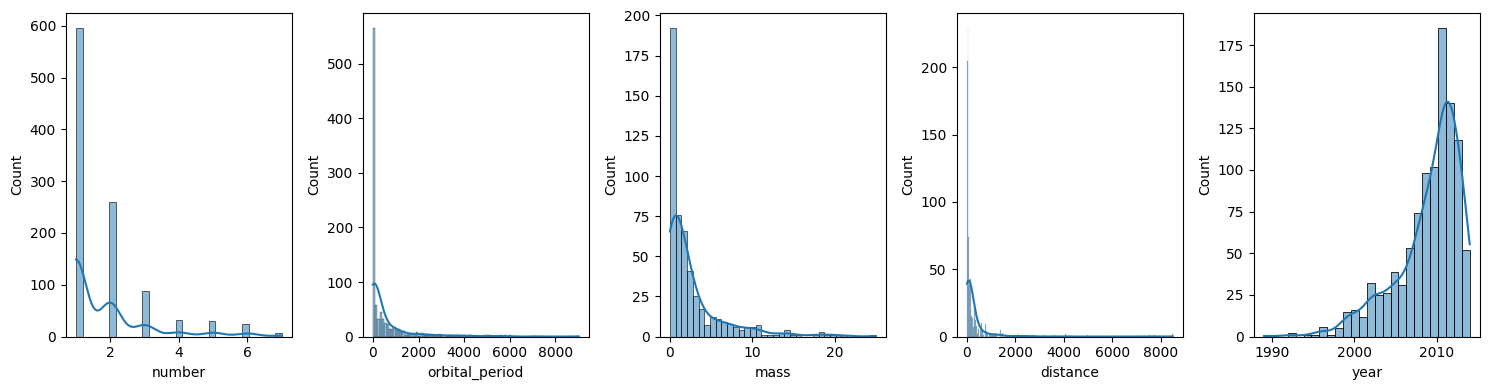

In [ ]:
# Histogram: View distribution of values in the dataset to help determine whether
# they are normally distributed and visualize skew.
# histplot function: https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.figure(figsize=(15,4))

for i in range(num_columns):
  data = df[columns[i]]

  # The visualization is not possible due to extreme outliers in the
  # otbital_period column. This eliminates some of the outliers tod
  # make the visualization work.
  if columns[i] == 'orbital_period':
    data = data[data < 10000]

  # Create a histogram of the values in each column. The "kde" parameter indicates
  # that Seaborn should smooth the distribution and include it as a line in the graph
  plt.subplot(1, num_columns,i+1)
  sns.histplot(data, kde=True)
  plt.tight_layout()